In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [260]:
data=pd.read_csv('wine_dataset.csv')
data

,Wine Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [261]:
data.isnull().sum()

Wine Class                      0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [262]:
data.skew()

Wine Class                      0.107431
Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
Total phenols                   0.086639
Flavanoids                      0.025344
Nonflavanoid phenols            0.450151
Proanthocyanins                 0.517137
Color intensity                 0.868585
Hue                             0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
dtype: float64

Outliers are present in Malic acid, Magnesium and Color intensity data columns due to which there is positive knewness. Please refer below plots for observations of the same

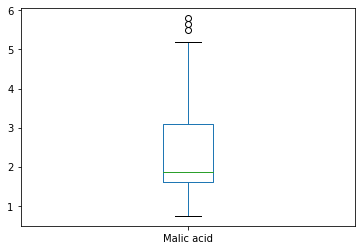

In [263]:
data['Malic acid'].plot.box()

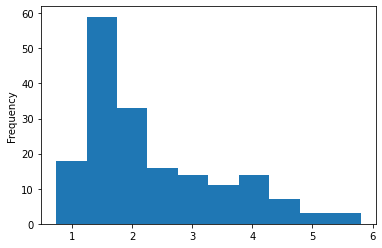

In [264]:
data['Malic acid'].plot.hist()

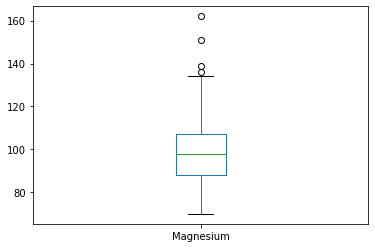

In [265]:
data['Magnesium'].plot.box()

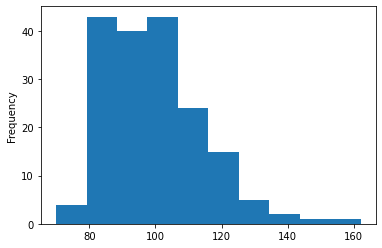

In [266]:
data['Magnesium'].plot.hist()

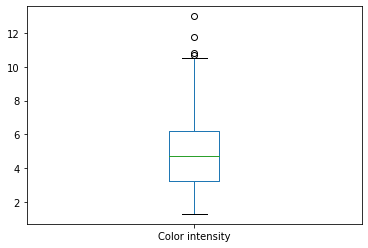

In [267]:
data['Color intensity'].plot.box()

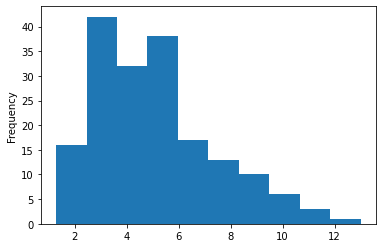

In [268]:
data['Color intensity'].plot.hist()

In [269]:
data.describe()

,Wine Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In Malic acid,Magnesium and Color Intensity mean is grater than median also there is large difference between Q3 and max in all these attributes so outliers are there.

In [270]:
cor=data.corr()
cor

,Wine Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Wine Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


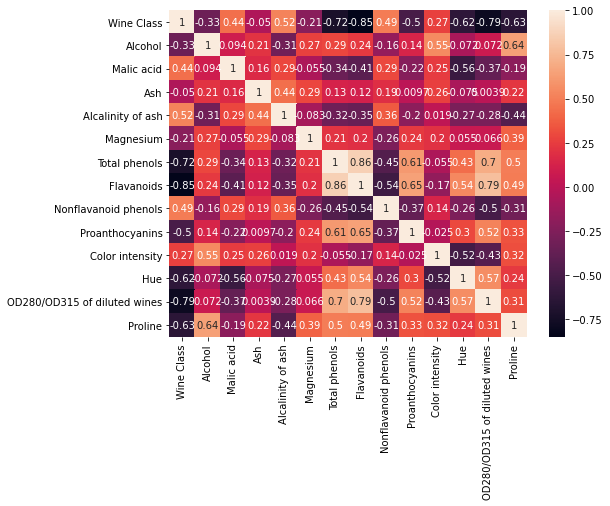

In [271]:
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True)

From above correlation we find that there is high negative correlation between output and Flavanoids,diluted wines, data columns and good correlation between output and Alcalinity of ash,Nonflavanoid phenols.Please find observation plots as below 

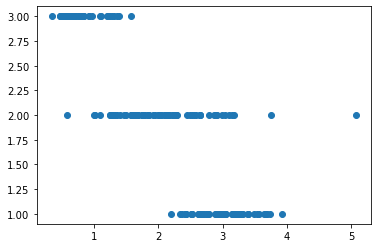

In [272]:
x=data['Flavanoids']
y=data['Wine Class']
plt.scatter(x,y)
plt.show()

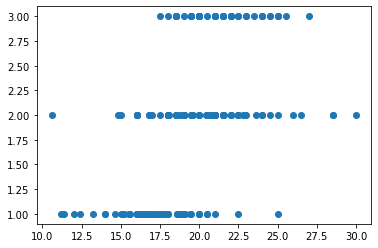

In [273]:
x=data['Alcalinity of ash']
y=data['Wine Class']
plt.scatter(x,y)
plt.show()

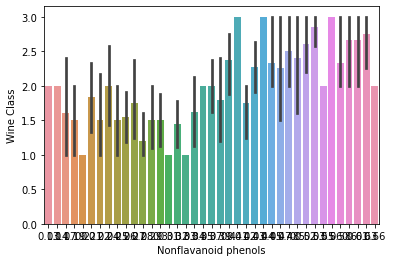

In [274]:
sns.barplot(x='Nonflavanoid phenols',y='Wine Class',data=data)
plt.show()

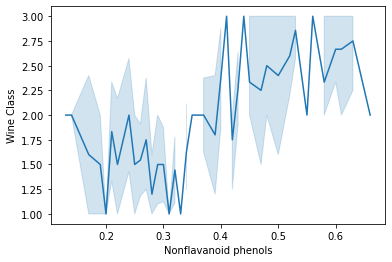

In [275]:
sns.lineplot(x='Nonflavanoid phenols',y='Wine Class',data=data)
plt.show()

From above plots we can also conclude that it is not a regression kind of problem but a classification one.

In [ ]:
plt.scatter(data['Flavanoids'],data['Wine Class'])

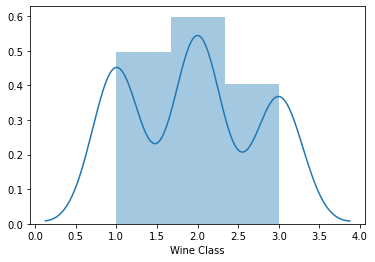

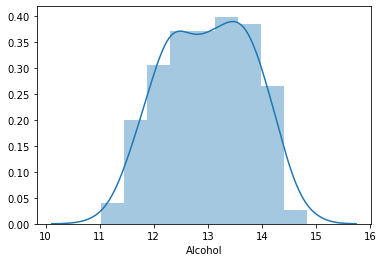

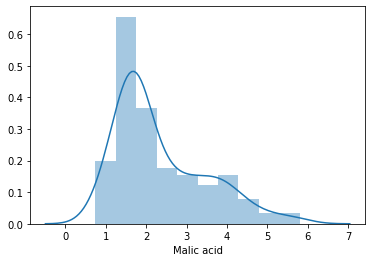

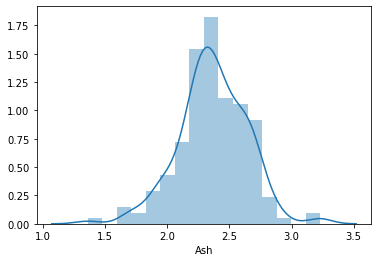

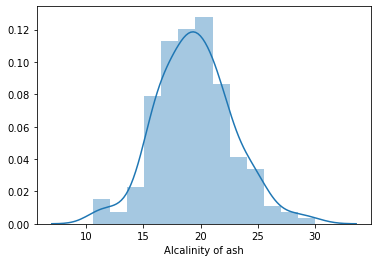

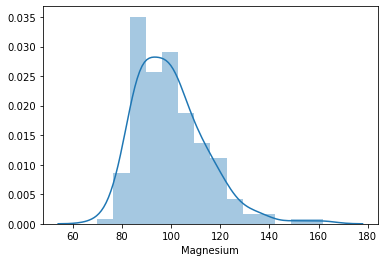

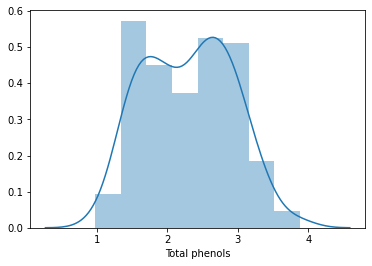

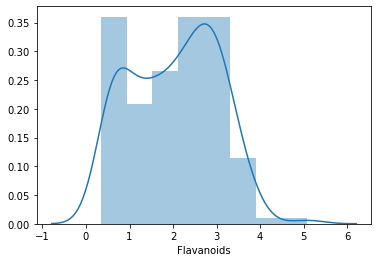

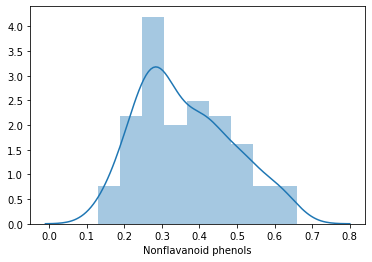

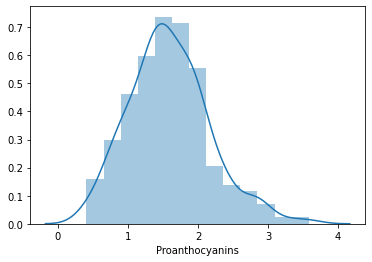

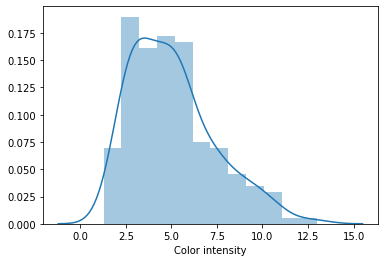

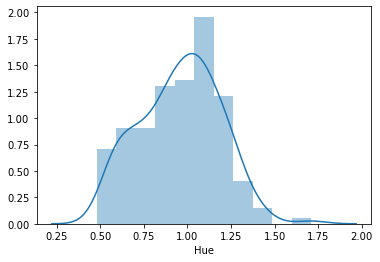

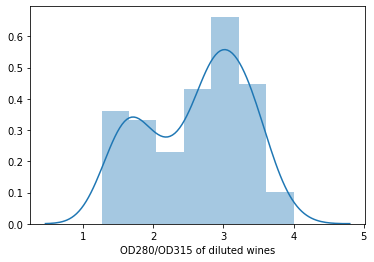

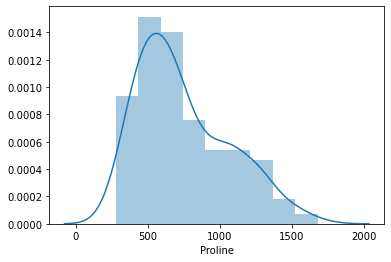

In [187]:
for i in data.columns:
    plt.figure()
    sns.distplot(data[i])

<Figure size 576x432 with 0 Axes>

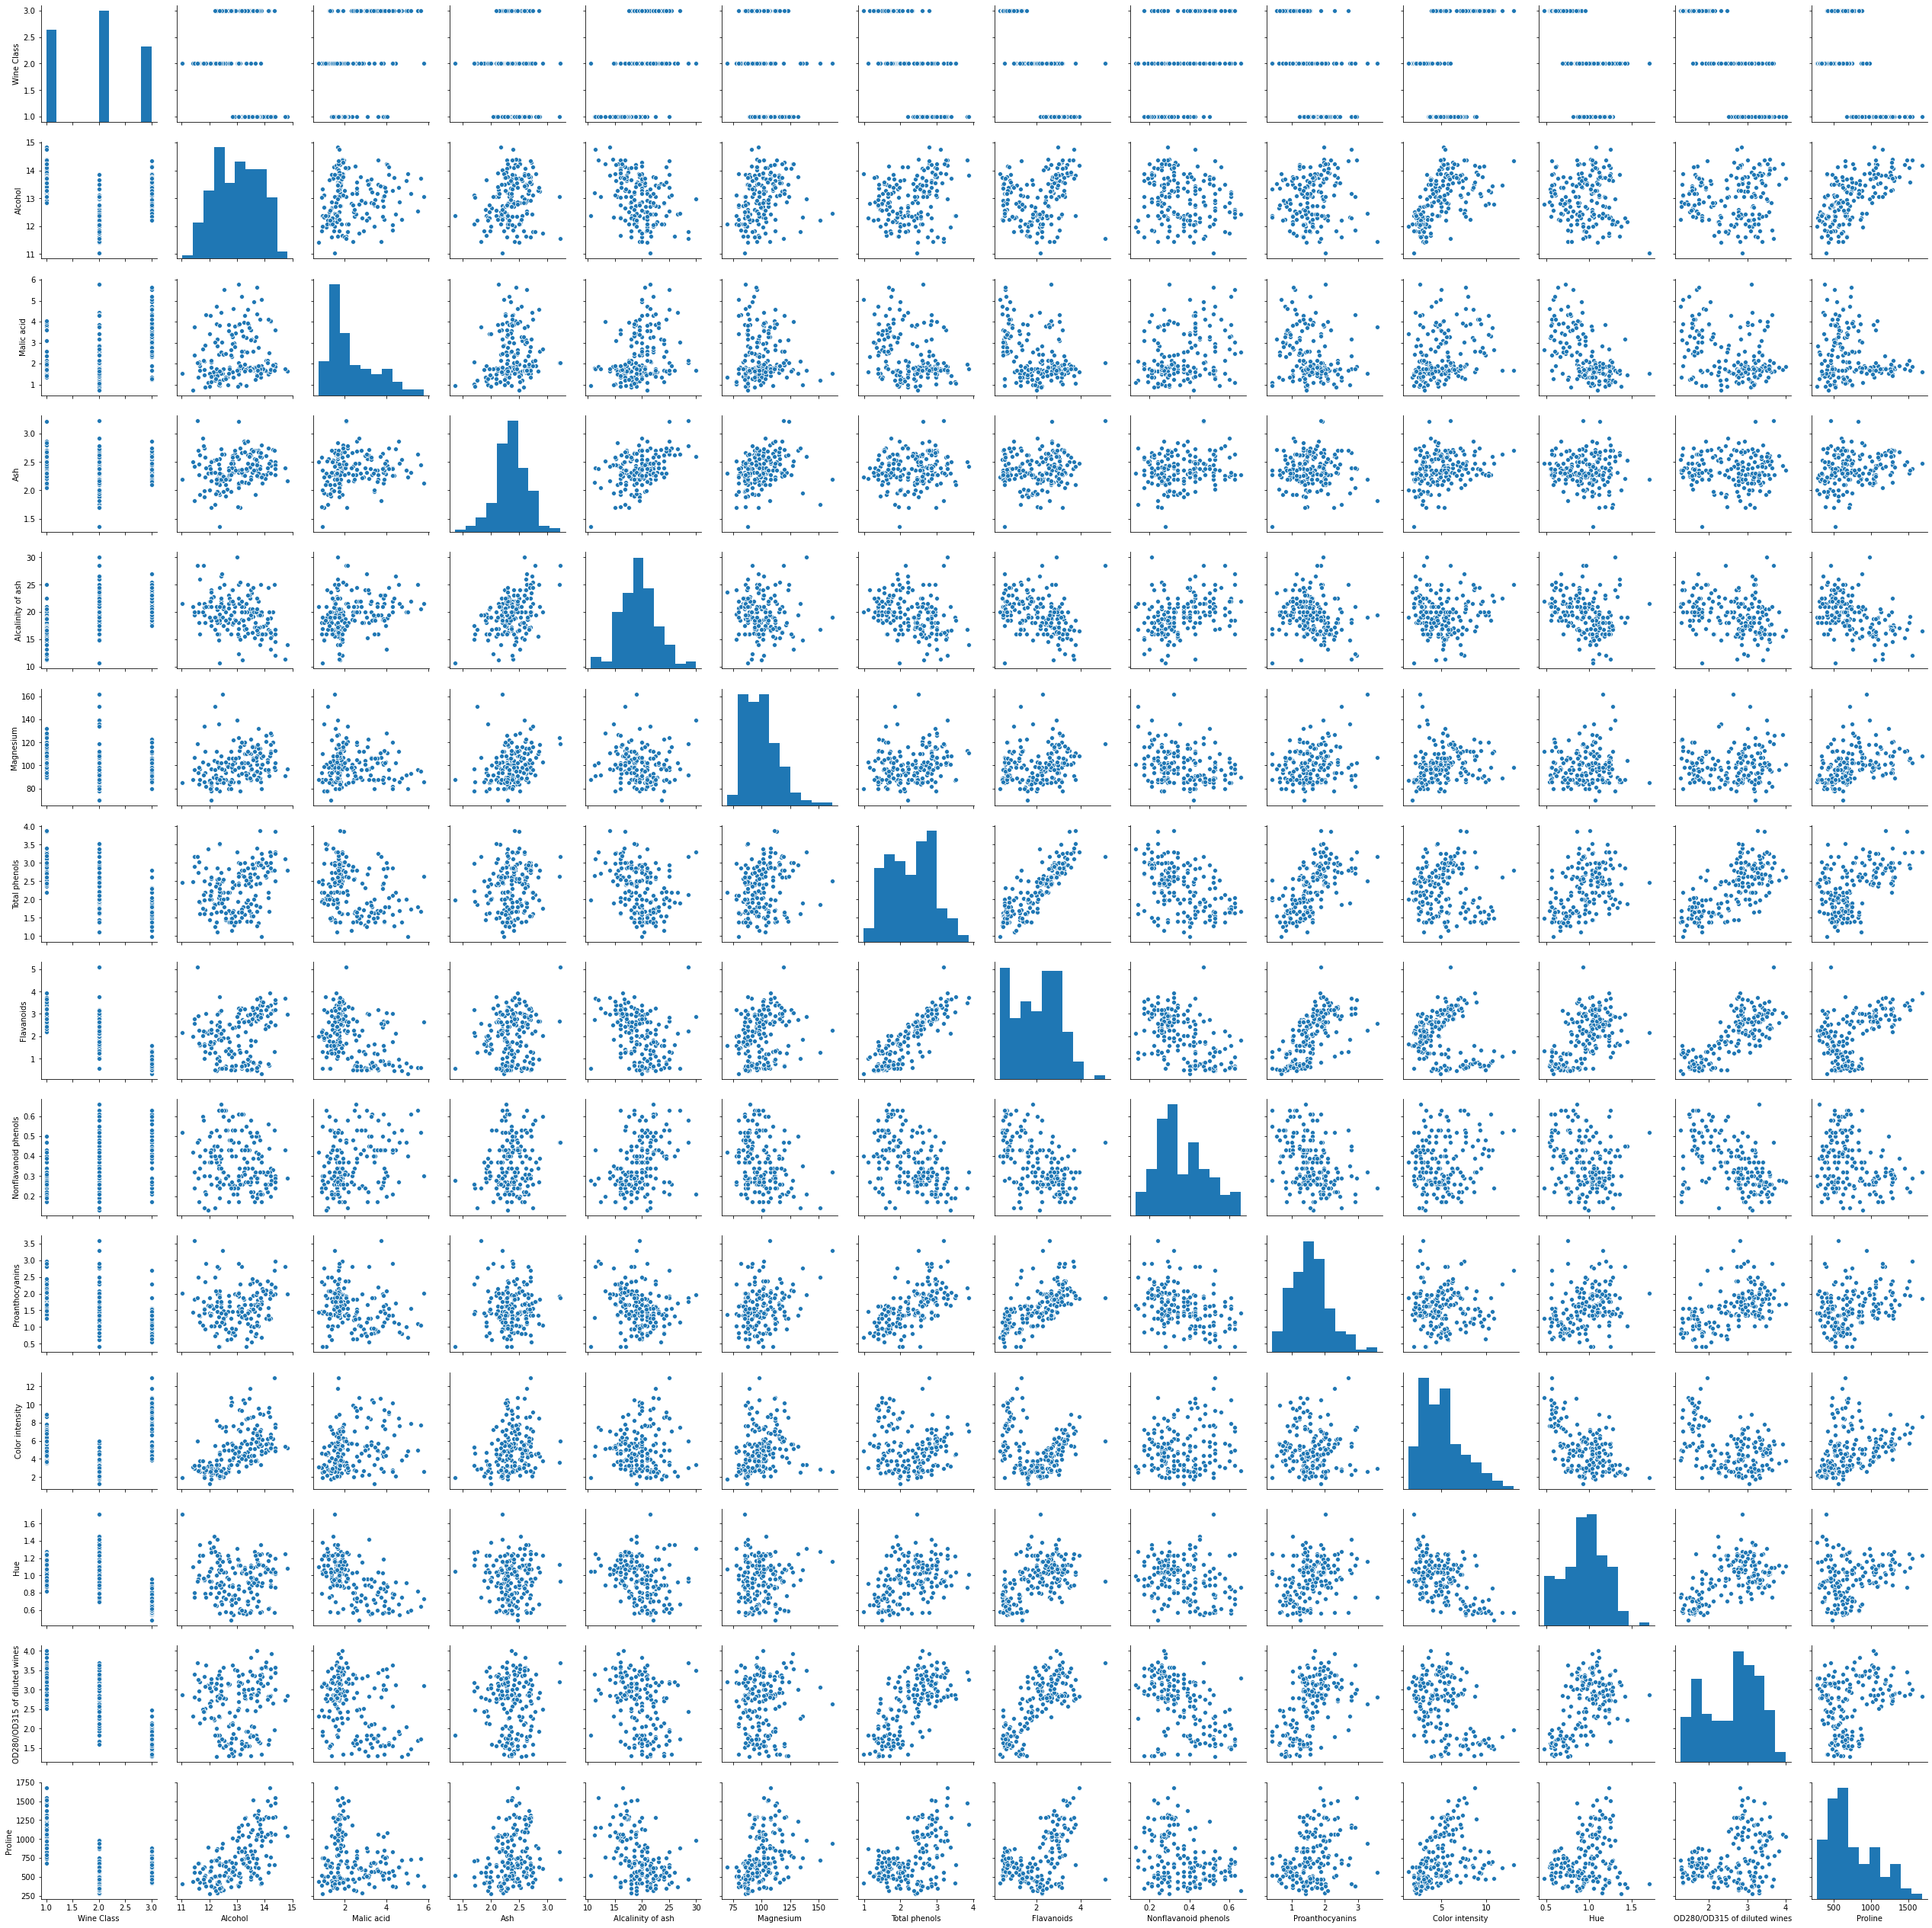

In [188]:
plt.figure(figsize=(8,6))
sns.pairplot(data)

In [276]:
from scipy.stats import zscore
z=np.abs(zscore(data))
data_new=data.loc[(z<3).all(axis=1)]
data_new

,Wine Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [277]:
data.shape

(178, 14)

In [278]:
data_new.shape

(168, 14)

In [279]:
data_new.skew()

Wine Class                      0.117053
Alcohol                        -0.028038
Malic acid                      0.966253
Ash                            -0.250438
Alcalinity of ash               0.104774
Magnesium                       0.566522
Total phenols                   0.132108
Flavanoids                     -0.077205
Nonflavanoid phenols            0.481810
Proanthocyanins                 0.360217
Color intensity                 0.732580
Hue                            -0.137430
OD280/OD315 of diluted wines   -0.282514
Proline                         0.744773
dtype: float64

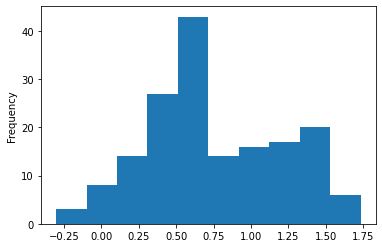

In [280]:
data_new['Malic acid']=np.log(data_new['Malic acid'])
data_new['Malic acid'].plot.hist()

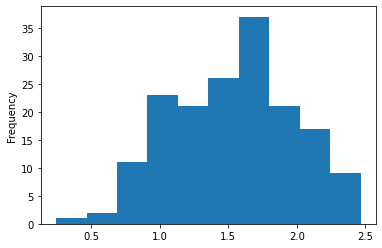

In [281]:
data_new['Color intensity']=np.log(data_new['Color intensity'])
data_new['Color intensity'].plot.hist()

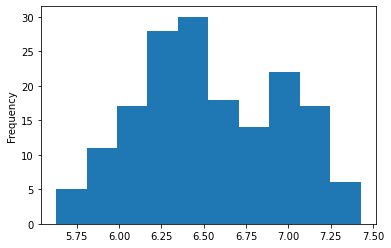

In [282]:
data_new['Proline']=np.log(data_new['Proline'])
data_new['Proline'].plot.hist()

In [283]:
data_new.skew()

Wine Class                      0.117053
Alcohol                        -0.028038
Malic acid                      0.231880
Ash                            -0.250438
Alcalinity of ash               0.104774
Magnesium                       0.566522
Total phenols                   0.132108
Flavanoids                     -0.077205
Nonflavanoid phenols            0.481810
Proanthocyanins                 0.360217
Color intensity                -0.165416
Hue                            -0.137430
OD280/OD315 of diluted wines   -0.282514
Proline                         0.070763
dtype: float64

In [284]:
x=data_new.iloc[:,1:14]
x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,0.536493,2.43,15.6,127,2.80,3.06,0.28,2.29,1.729884,1.04,3.92,6.970730
1,13.20,0.576613,2.14,11.2,100,2.65,2.76,0.26,1.28,1.477049,1.05,3.40,6.956545
2,13.16,0.858662,2.67,18.6,101,2.80,3.24,0.30,2.81,1.736951,1.03,3.17,7.077498
3,14.37,0.667829,2.50,16.8,113,3.85,3.49,0.24,2.18,2.054124,0.86,3.45,7.299797
4,13.24,0.951658,2.87,21.0,118,2.80,2.69,0.39,1.82,1.463255,1.04,2.93,6.599870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,1.731656,2.45,20.5,95,1.68,0.61,0.52,1.06,2.041220,0.64,1.74,6.606650
174,13.40,1.363537,2.48,23.0,102,1.80,0.75,0.43,1.41,1.987874,0.70,1.56,6.620073
175,13.27,1.453953,2.26,20.0,120,1.59,0.69,0.43,1.35,2.322388,0.59,1.56,6.727432
176,13.17,0.951658,2.37,20.0,120,1.65,0.68,0.53,1.46,2.230014,0.60,1.62,6.733402


In [285]:
y=data_new.iloc[:,0]
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine Class, Length: 168, dtype: int64

In [286]:
x.shape

(168, 13)

In [287]:
y.shape

(168,)

In [288]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.513539,-0.481876,0.250637,-1.209653,2.253466,0.840250,1.068668,-0.669081,1.395565,0.433995,0.403766,1.857453,1.038277
1,0.210929,-0.391659,-0.945351,-2.624711,0.097439,0.600640,0.763248,-0.830933,-0.517348,-0.131747,0.449249,1.127605,1.004333
2,0.160342,0.242578,1.240421,-0.244840,0.177292,0.840250,1.251920,-0.507230,2.380432,0.449808,0.358284,0.804788,1.293778
3,1.690593,-0.186543,0.539324,-0.823728,1.135526,2.517517,1.506437,-0.992784,1.187228,1.159510,-0.414920,1.197783,1.825751
4,0.261516,0.451697,2.065240,0.527010,1.534790,0.840250,0.691983,0.221100,0.505398,-0.162610,0.403766,0.467935,0.150793
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.855910,2.205662,0.333119,0.366208,-0.301825,-0.948835,-1.425598,1.273133,-0.934022,1.130637,-1.415537,-1.202294,0.167017
164,0.463863,1.377882,0.456842,1.170218,0.257145,-0.757147,-1.283068,0.544803,-0.271131,1.011271,-1.142641,-1.454934,0.199139
165,0.299456,1.581198,-0.450459,0.205406,1.694496,-1.092601,-1.344152,0.544803,-0.384770,1.759775,-1.642949,-1.454934,0.456053
166,0.172989,0.451697,0.003191,0.205406,1.694496,-0.996757,-1.354333,1.354059,-0.176433,1.553081,-1.597467,-1.370721,0.470340


In [356]:
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    sv=SVC(kernel='rbf',C=1)
    dtc=DecisionTreeClassifier(criterion='gini')
    kn=KNeighborsClassifier(n_neighbors=22)
    gn=GaussianNB()
    model=[sv,dtc,kn,gn]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        if accuracy>0.99:
            print('max accuracy score for',m,'corresponding to',r_state,'is',accuracy)

max accuracy score for SVC(C=1) corresponding to 42 is 1.0
max accuracy score for GaussianNB() corresponding to 42 is 1.0
max accuracy score for GaussianNB() corresponding to 43 is 1.0
max accuracy score for SVC(C=1) corresponding to 44 is 1.0
max accuracy score for KNeighborsClassifier(n_neighbors=22) corresponding to 44 is 1.0
max accuracy score for GaussianNB() corresponding to 44 is 1.0
max accuracy score for SVC(C=1) corresponding to 45 is 1.0
max accuracy score for KNeighborsClassifier(n_neighbors=22) corresponding to 45 is 1.0
max accuracy score for GaussianNB() corresponding to 45 is 1.0
max accuracy score for SVC(C=1) corresponding to 46 is 1.0
max accuracy score for SVC(C=1) corresponding to 47 is 1.0
max accuracy score for KNeighborsClassifier(n_neighbors=22) corresponding to 47 is 1.0
max accuracy score for GaussianNB() corresponding to 47 is 1.0
max accuracy score for GaussianNB() corresponding to 48 is 1.0
max accuracy score for SVC(C=1) corresponding to 49 is 1.0
max acc

from above result we can observe that at random state= 86 most of the models have accuracy score =1

In [357]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=86) 

In [358]:
x_train.shape

(126, 13)

In [359]:
x_test.shape

(42, 13)

In [360]:
y_train.shape

(126,)

In [361]:
y_test.shape

(42,)

Hyperparameter Tuning for all classification models

In [362]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.8873440285204992


In [363]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':['linear','rbf'],'C':[1,10]}
clf=GridSearchCV(svc,parameters,scoring='accuracy',cv=5)
clf.fit(x,y)
print(sorted(clf.cv_results_.keys()))
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
{'C': 1, 'kernel': 'rbf'}
0.9941176470588236


In [364]:
from sklearn.model_selection import GridSearchCV
kn=KNeighborsClassifier()
grid_param={'n_neighbors':range(3,100)}
gd=GridSearchCV(estimator=kn,param_grid=grid_param,scoring='accuracy',cv=5)
gd.fit(x,y)
best_parameters=gd.best_params_
print(best_parameters)
best_result=gd.best_score_
print(best_result)

{'n_neighbors': 22}
0.9705882352941178


Applying best parameters into the models and observing the performance

In [366]:
sv=SVC(kernel='rbf',C=1)
dtc=DecisionTreeClassifier(criterion='gini')
kn=KNeighborsClassifier(n_neighbors=22)
gn=GaussianNB()

model=[sv,dtc,kn,gn]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print('Confusion matrix of',m,'is:')
    print(confusion_matrix(y_test,predm))
    print('\n')

0.9920634920634921
Accuracy score of SVC(C=1) is:
1.0
Confusion matrix of SVC(C=1) is:
[[12  0  0]
 [ 0 16  0]
 [ 0  0 14]]


1.0
Accuracy score of DecisionTreeClassifier() is:
0.9047619047619048
Confusion matrix of DecisionTreeClassifier() is:
[[12  0  0]
 [ 1 13  2]
 [ 0  1 13]]


0.9761904761904762
Accuracy score of KNeighborsClassifier(n_neighbors=22) is:
0.9761904761904762
Confusion matrix of KNeighborsClassifier(n_neighbors=22) is:
[[12  0  0]
 [ 1 15  0]
 [ 0  0 14]]


0.9920634920634921
Accuracy score of GaussianNB() is:
0.9761904761904762
Confusion matrix of GaussianNB() is:
[[12  0  0]
 [ 0 15  1]
 [ 0  0 14]]




From above results we can see SVC() model is working best among others.

Cross Validation - Here also we can see that SVC() model has greatest meanscore and lowest standard deviation amongst others

In [370]:
from sklearn.model_selection import cross_val_score
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.82352941 0.85294118 0.88235294 0.96969697 0.87878788]
0.8814616755793226 0.04891416304460695


In [371]:
from sklearn.model_selection import cross_val_score
svscores=cross_val_score(sv,x,y,cv=5)
print(svscores)
print(svscores.mean(),svscores.std())

[1.         0.97058824 1.         1.         1.        ]
0.9941176470588236 0.011764705882352944


In [372]:
from sklearn.model_selection import cross_val_score
knscores=cross_val_score(kn,x,y,cv=5)
print(knscores)
print(knscores.mean(),knscores.std())

[0.91176471 0.94117647 1.         1.         1.        ]
0.9705882352941178 0.037203266590216236


Saving the best model to external file then loading it back to predict result.

In [373]:
#here the best model is GaussianNB(),so I will save it into the external file for future reference to predict result
import joblib
sv=SVC(C=1)
sv.fit(x_train,y_train)
joblib.dump(sv,'filesv.obj')
homefile=joblib.load('filesv.obj')
homefile.predict(x_test)

array([2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1,
       2, 1, 3, 2, 1, 2, 1, 1, 3, 2, 3, 1, 3, 2, 2, 3, 2, 2, 3, 2],
      dtype=int64)